### OBJECTIVE
---
To help an __AMC company__ to take a decision of making an investment of __5 to 15 million dollars__ in the available investment type like Venture, Private Equity...etc

[To find out more about AMC working](https://www.wallstreetmojo.com/what-is-asset-management-company-amc/)

In [156]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
import re
import numpy as np
sns.set_style("dark") 
from numpy import mean, median
pd.options.display.float_format = '{:.2f}'.format

### Companies & Rounds2 dataframe primilinary analysis
- Read __companies__ file and store it as a __companies__ dataframe
- Read _rounds2_ file and store it as a __rounds2__ dataframe
- Get the basic info about the dataframe like no. of rows and columns, see what are the columns available


In [157]:
# reading companies data
companies = pd.read_csv('companies.txt', sep='\t', encoding='ISO-8859-1')

In [158]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 5.1+ MB


In [159]:
def find_duplicate(df,column): 
    identify_duplicate=lambda val:'Duplicates: ' if val>1 else 'No Duplicates: '
    return df[column].value_counts().apply(identify_duplicate).value_counts()


#**************************************************************************************#

col_list = list(companies.columns)
for col_no,col in enumerate(col_list):
    print(f'{col_no}-->{col.upper()}\n{find_duplicate(companies, col)}\n')

0-->PERMALINK
No Duplicates:     66368
Name: permalink, dtype: int64

1-->NAME
No Duplicates:     65863
Duplicates:          239
Name: name, dtype: int64

2-->HOMEPAGE_URL
No Duplicates:     61077
Duplicates:          114
Name: homepage_url, dtype: int64

3-->CATEGORY_LIST
No Duplicates:     24779
Duplicates:         2517
Name: category_list, dtype: int64

4-->STATUS
Duplicates:     4
Name: status, dtype: int64

5-->COUNTRY_CODE
Duplicates:        116
No Duplicates:      21
Name: country_code, dtype: int64

6-->STATE_CODE
Duplicates:        264
No Duplicates:      47
Name: state_code, dtype: int64

7-->REGION
Duplicates:        878
No Duplicates:     214
Name: region, dtype: int64

8-->CITY
No Duplicates:     2614
Duplicates:        2497
Name: city, dtype: int64

9-->FOUNDED_AT
Duplicates:        2497
No Duplicates:     1481
Name: founded_at, dtype: int64



In [160]:
## capitalize permalink column to make it consistent with the company_permalink column of the rounds2 dataframe
companies['permalink'] = companies.permalink.str.capitalize()

In [161]:
companies.shape

(66368, 10)

In [162]:
companies[(companies.status != 'closed')]['category_list'].isnull().value_counts()

False    57935
True      2195
Name: category_list, dtype: int64

In [163]:
2195/66368

0.033073167791706846

## ==============================================================

In [164]:
rounds2 = pd.read_csv('rounds2.csv', encoding='ISO-8859-1')

In [165]:
rounds2.shape

(114949, 6)

In [166]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [167]:
## capitalize rounds2 dataframes company_permalink column to make it consistent with the 
## permalink column of the companies dataframe to perform merge operation
rounds2['company_permalink'] = rounds2.company_permalink.str.capitalize()

In [168]:
col_list = list(rounds2.columns)
for col_no,col in enumerate(col_list):
    print(f'{col_no}-->{col.upper()}\n{find_duplicate(rounds2, col)}\n')

0-->COMPANY_PERMALINK
No Duplicates:     42493
Duplicates:        23877
Name: company_permalink, dtype: int64

1-->FUNDING_ROUND_PERMALINK
No Duplicates:     114949
Name: funding_round_permalink, dtype: int64

2-->FUNDING_ROUND_TYPE
Duplicates:     14
Name: funding_round_type, dtype: int64

3-->FUNDING_ROUND_CODE
Duplicates:     8
Name: funding_round_code, dtype: int64

4-->FUNDED_AT
Duplicates:        4232
No Duplicates:      801
Name: funded_at, dtype: int64

5-->RAISED_AMOUNT_USD
No Duplicates:     19194
Duplicates:         2901
Name: raised_amount_usd, dtype: int64



### <center>==========================  Section 1: MASTER FRAME  ===============================</center>

In [169]:
def get_missing_percent(df, col):
    is_missing = df[col].isnull().value_counts().index
    count_rows = df[col].isnull().value_counts()
    if True in is_missing:
        missing_percent = str(round((count_rows[1]/df.shape[0])*100,2))+'%'
        return f"Total missing Values: {missing_percent}"
    else:
        return 'None of the values are missing'

In [170]:
def change_font_case(fund_str):
        return fund_str.capitalize()    

def create_master_frame(data_frame1, data_frame2):
    ## Merged rounds2 and companies dataframe using permalink on right as a key and company_permalink on left
    master_frame= data_frame1.merge(data_frame2, how='left' ,left_on='company_permalink', right_on='permalink',\
                                    suffixes=('_left','_right'))

    ## keeping a copy of the master frame data
    master_frame_copy = master_frame.copy()
        
    ## change raised_amount_usd to millions
    master_frame['raised_amount_usd (millions)'] = master_frame['raised_amount_usd']/(10**6) 

    ## filter observations for funding type not equal to seed, venture, private equity and angel
    fund_type_filter = ['seed','venture','private_equity','angel']

    master_frame = master_frame[master_frame['funding_round_type'].\
                                isin(fund_type_filter)]

    ## checking rows and columns
    print(f'Rows: {master_frame.shape[0]}, Columns: {master_frame.shape[1]}\n')
    print("*******************************************************************************")

    ## counting total rows without droping na values
    total_rows_with_na = master_frame.shape[0]

    col_list = list(master_frame.columns)
    for col_no,col in enumerate(col_list):
        print(f'{col_no}-->{col.upper()}\n{get_missing_percent(master_frame, col)}\n')

    na_values_filter = (master_frame.category_list.notna()) & (master_frame.country_code.notna()) & \
    (master_frame.raised_amount_usd.notna()) & (master_frame.name.notna())

    master_frame = master_frame[na_values_filter]

    ## Total % of rows after dropping na_values
    total_rows_without_na_per = str(round((master_frame.shape[0]/total_rows_with_na)*100,2))+'%'
    print("*******************************************************************************")
    print(f'Percentage of rows after droppping na values {total_rows_without_na_per}')

    funded_at = pd.to_datetime(master_frame.funded_at)
    funded_month = funded_at.apply(lambda x: x.month)
    master_frame['funded_month'] = funded_month

    col_names = [col.capitalize() for col in list(master_frame.columns)]

    master_frame.columns = col_names

    ## changing font case column for consistent purpose    
    master_frame['Funding_round_type']=master_frame.Funding_round_type.apply(change_font_case)
    ## checking rows and columns
    print(f'Rows: {master_frame.shape[0]}, Columns: {master_frame.shape[1]}\n')
    print("*******************************************************************************")

    return master_frame

In [171]:
master_frame = create_master_frame(rounds2, companies)

Rows: 94397, Columns: 17

*******************************************************************************
0-->COMPANY_PERMALINK
None of the values are missing

1-->FUNDING_ROUND_PERMALINK
None of the values are missing

2-->FUNDING_ROUND_TYPE
None of the values are missing

3-->FUNDING_ROUND_CODE
Total missing Values: 67.03%

4-->FUNDED_AT
None of the values are missing

5-->RAISED_AMOUNT_USD
Total missing Values: 14.59%

6-->PERMALINK
Total missing Values: 0.01%

7-->NAME
Total missing Values: 0.01%

8-->HOMEPAGE_URL
Total missing Values: 4.4%

9-->CATEGORY_LIST
Total missing Values: 2.65%

10-->STATUS
Total missing Values: 0.01%

11-->COUNTRY_CODE
Total missing Values: 7.76%

12-->STATE_CODE
Total missing Values: 9.83%

13-->REGION
Total missing Values: 9.07%

14-->CITY
Total missing Values: 9.06%

15-->FOUNDED_AT
Total missing Values: 17.72%

16-->RAISED_AMOUNT_USD (MILLIONS)
Total missing Values: 14.59%

******************************************************************************

In [172]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75123 entries, 0 to 114947
Data columns (total 18 columns):
Company_permalink               75123 non-null object
Funding_round_permalink         75123 non-null object
Funding_round_type              75123 non-null object
Funding_round_code              26760 non-null object
Funded_at                       75123 non-null object
Raised_amount_usd               75123 non-null float64
Permalink                       75123 non-null object
Name                            75123 non-null object
Homepage_url                    72563 non-null object
Category_list                   75123 non-null object
Status                          75123 non-null object
Country_code                    75123 non-null object
State_code                      73591 non-null object
Region                          74092 non-null object
City                            74095 non-null object
Founded_at                      63896 non-null object
Raised_amount_usd (millio

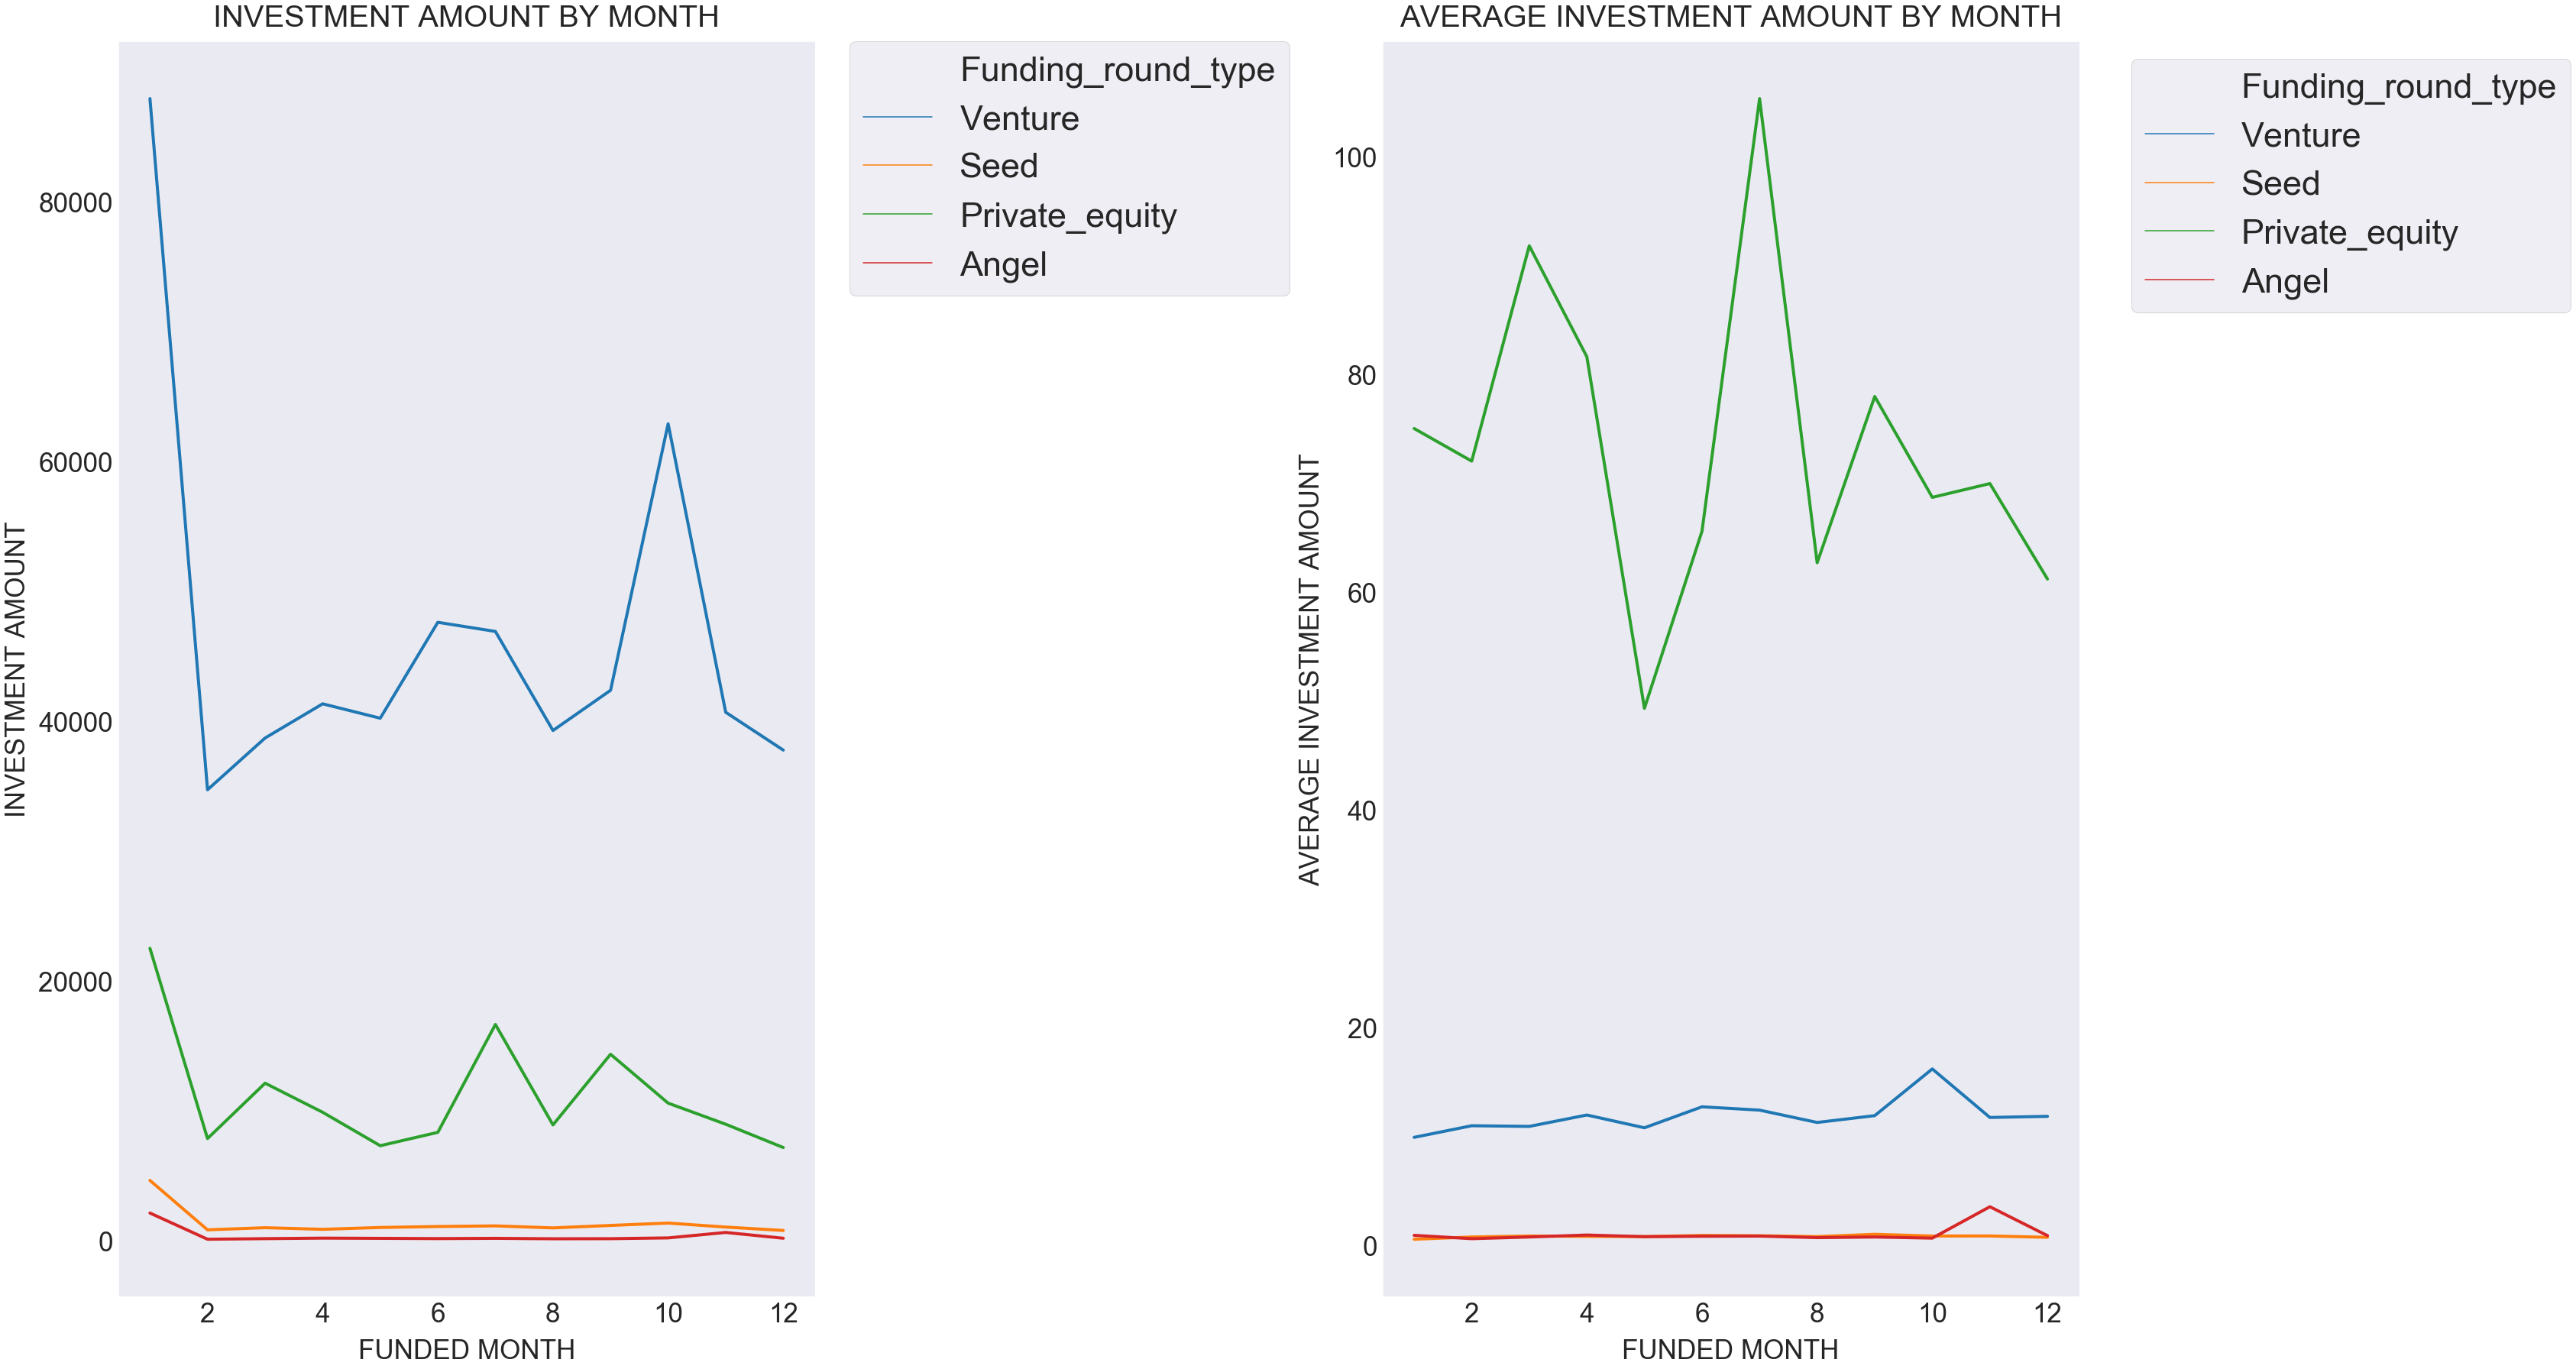

In [173]:
'''
Plot to understand Total Investment amount break up by month
'''

fig_1, ax_1 = plt.subplots(1,2, figsize=(38,25))

line_plot1_params = {'y':"Raised_amount_usd (millions)", 'x':"Funded_month", 
                 'ci':None,
                 'hue':"Funding_round_type", 'data':master_frame,
                  'ax':ax_1[0],
                   'lw':4,  
                 'estimator':sum
               }


sns.lineplot(**line_plot1_params);
ax_1[0].set_title("INVESTMENT AMOUNT BY MONTH", pad=20, fontsize=40)
ax_1[0].set_xlabel('FUNDED MONTH', fontsize=35, labelpad=15);
ax_1[0].set_ylabel('INVESTMENT AMOUNT', fontsize=35, labelpad=10);
# ax_1[0].set_xticklabels(plot_1.get_xticklabels(),rotation=90);
ax_1[0].tick_params(axis='both', which='major', labelsize=35);
ax_1[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., prop={'size': 45});

##************************************************************************************************************
'''
Plot to understand Average Investment amount break up by month
'''
line_plot2_params = {'y':"Raised_amount_usd (millions)", 'x':"Funded_month", 
                 'ci':None,
                 'hue':"Funding_round_type", 'data':master_frame,
                  'ax':ax_1[1],
                  'lw':4,   
                 'estimator':mean
               }


sns.lineplot(**line_plot2_params);
ax_1[1].set_title("AVERAGE INVESTMENT AMOUNT BY MONTH", pad=20, fontsize=40)
ax_1[1].set_xlabel('FUNDED MONTH', fontsize=35, labelpad=15);
ax_1[1].set_ylabel('AVERAGE INVESTMENT AMOUNT', fontsize=35, labelpad=10);
# ax_1[1].set_xticklabels(plot_2.get_xticklabels(),rotation=90);
ax_1[1].tick_params(axis='both', which='major', labelsize=35);
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, prop={'size': 45});



__Findings:__

1. Total investment amount is being more dominated by Venture fund shown in the blueline, as there is a significant consistent upshift of 15 billions approx. from the max investment amount of the remaining three funds.

2. Average investment amount is being more dominated by Private Equity fund shown in the greenline, as there is a significant consistent upshift of 40 millions approx. from the max investment amount of the remaining three funds.


In [174]:
master_frame.groupby(['Funding_round_type'])['Funding_round_type']\
.agg('count')

Funding_round_type
Angel              4400
Private_equity     1820
Seed              21094
Venture           47809
Name: Funding_round_type, dtype: int64

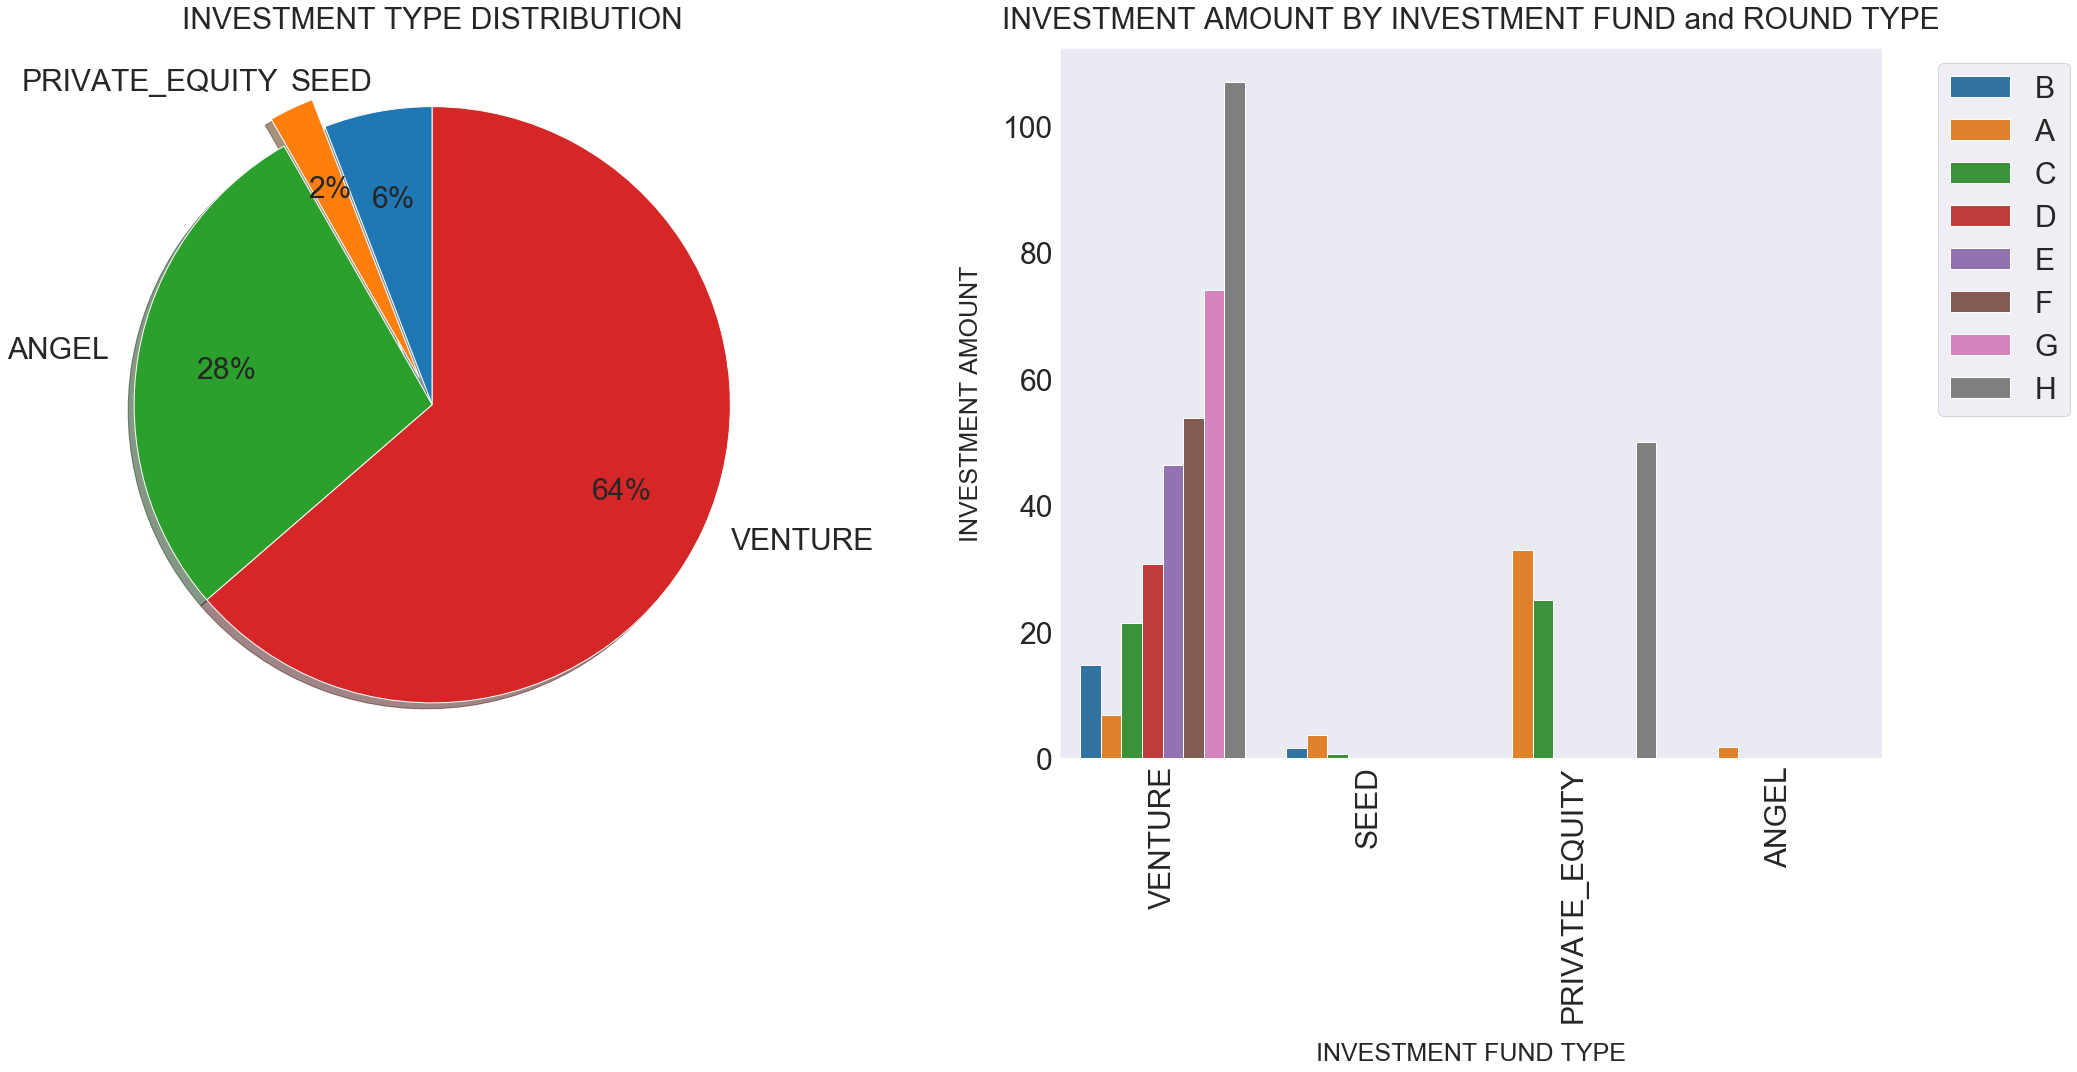

In [175]:
'''
Plot to understand the Count distribution among the four funds Private Equity, Venture, Seed and Angel
'''



fig_2, ax_2 = plt.subplots(1,2, figsize=(30,15))

pie_plot3_labels = ['SEED','PRIVATE_EQUITY','ANGEL','VENTURE']


pie_plot3_params = { 'ax':ax_2[0], 'kind':'pie', 'autopct':'%1.f%%', 
                'fontsize':30,  'explode':(0,0.1,0,0),
                'labels':pie_plot3_labels,'startangle':90,
                'shadow':True,'pctdistance':0.7
              }

master_frame.groupby(['Funding_round_type'])['Funding_round_type']\
.agg('count')\
.plot(**pie_plot3_params);
ax_2[0].set_title('INVESTMENT TYPE DISTRIBUTION', fontsize=30, pad=20);
ax_2[0].set_ylabel('');
ax_2[0].axis('equal')


##************************************************************************************************************
'''
Plot to understand total Investment Amount break up by Investment Fund Type and Investment Round type
'''

bar_plot4_params = {'y':"Raised_amount_usd (millions)", 'x':"Funding_round_type", 
                 'ci':None,
                 'hue':"Funding_round_code", 'data':master_frame,
                  'ax':ax_2[1],
                 'estimator':mean
               }
bar_plot4_x_labels = [labels.upper() for labels in master_frame.Funding_round_type.unique()]

# sns.set_context("talk")

sns.barplot(**bar_plot4_params);
ax_2[1].set_title("INVESTMENT AMOUNT BY INVESTMENT FUND and ROUND TYPE", pad=20, fontsize=30)
ax_2[1].set_xlabel('INVESTMENT FUND TYPE', fontsize=25, labelpad=20);
ax_2[1].set_ylabel('INVESTMENT AMOUNT', fontsize=25, labelpad=20);
ax_2[1].set_xticklabels(bar_plot4_x_labels, rotation=90);
ax_2[1].tick_params(axis='both', which='major', labelsize=30);
ax_2[1].legend(bbox_to_anchor=(1.05, 1), loc=2, prop={'size': 30});
plt.tight_layout()


__Findings:__

1. From pie chart visual, Venture fund in the red color, carries more than half of the whole distribution against remaining three funds

2. From bar chart, Venture fund recieved investment amount for almost every single investment round, as it has   more number of sticks relative to other funds

In [176]:
master_frame.groupby(['Funding_round_type','Funding_round_code'])['Raised_amount_usd (millions)']\
.mean()\
.unstack()

Funding_round_code     A     B     C     D     E     F     G      H
Funding_round_type                                                 
Angel               1.81   nan   nan   nan   nan   nan   nan    nan
Private_equity     32.95   nan 25.00   nan   nan   nan   nan  50.00
Seed                3.74  1.62  0.60   nan   nan   nan   nan    nan
Venture             6.88 14.68 21.37 30.70 46.40 53.78 74.08 106.91

__Findings:__

1. Private Equity fund average investment is from __25 to 50 million approx__ and recieved investment for only __three rounds of investment__.

2. Angel fund average investement is __2 million approx__ and recieved investment for only __one round of investment__.

3. Seed fund average investment is from __900k to 4 million approx__ and recieved investment for only __three rounds of investment__.

4. Venture fund average investment is from __6 million to 150 million approx__ and recieved investment for all the __eight rounds of investment__. 

In [177]:
## calculate average investment by funding type
master_frame.groupby(['Funding_round_type'])['Raised_amount_usd']\
.mean()\
.sort_values(ascending=False)

Funding_round_type
Private_equity   73938486.28
Venture          11724222.69
Angel              971573.89
Seed               747827.95
Name: Raised_amount_usd, dtype: float64

__Findings:__
1. __Angel__ fund total average investment is __970k approx__.
2. __Private__ Equity fund total average investment is __74 million approx__.
3. __Seed__ fund total average investment is __750k approx__.
4. __Venture__ fund total average investment is __12 million approx__.

In [178]:
## total investments break up by funding_round_type
master_frame.Funding_round_type.value_counts()


Venture           47809
Seed              21094
Angel              4400
Private_equity     1820
Name: Funding_round_type, dtype: int64

__Observation:__ _Venture fund recieved most number of investments_

In [179]:
master_frame.groupby(['Name'])['Raised_amount_usd (millions)']\
.mean()\
.sort_values(ascending=False)[:10]

Name
Freescale Semiconductor   17600.00
Ping An                    4745.46
First Data Corporation     3500.00
MediaVast                  2357.50
Venari Resources           1498.52
SoftViaNet                  915.00
Alibaba                     785.33
St. George's University     750.00
Moda Midstream              750.00
Delta Hydrocarbons          750.00
Name: Raised_amount_usd (millions), dtype: float64

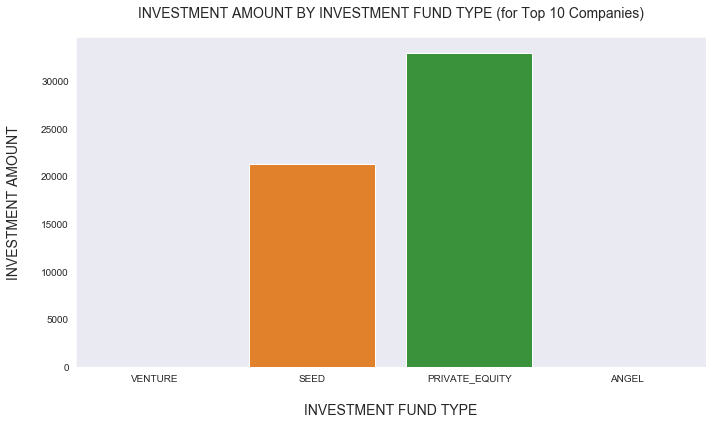

In [180]:
fig_3, ax_3 = plt.subplots(1,1, figsize=(10,6))

top_10_companies=list(master_frame.groupby(['Name'])['Raised_amount_usd (millions)']\
.sum()\
.sort_values(ascending=False)[:10].index)


## plot average investment by funding type and funding round code
bar_plot5_params = {'y':"Raised_amount_usd (millions)", 'x':"Funding_round_type", 
                 'ci':None,
                 'data':master_frame[master_frame.Name.isin(top_10_companies)],
                 'ax':ax_3,
                 'estimator':sum
               }

# sns.set_context("talk")

sns.barplot(**bar_plot5_params);
bar_plot5_x_labels = [labels.upper() for labels in master_frame.Funding_round_type.unique()]


ax_3.set_title("INVESTMENT AMOUNT BY INVESTMENT FUND TYPE (for Top 10 Companies)", pad=20, fontsize=14)
ax_3.set_xlabel('INVESTMENT FUND TYPE', fontsize=14, labelpad=20);
ax_3.set_ylabel('INVESTMENT AMOUNT', fontsize=14, labelpad=20);
ax_3.set_xticklabels(bar_plot5_x_labels)

plt.tight_layout()


__Findings__:
1. From the bar plot of the top 10 companies by average investment amount, it is clearly visible that Venture fund recieved the most part of the average 

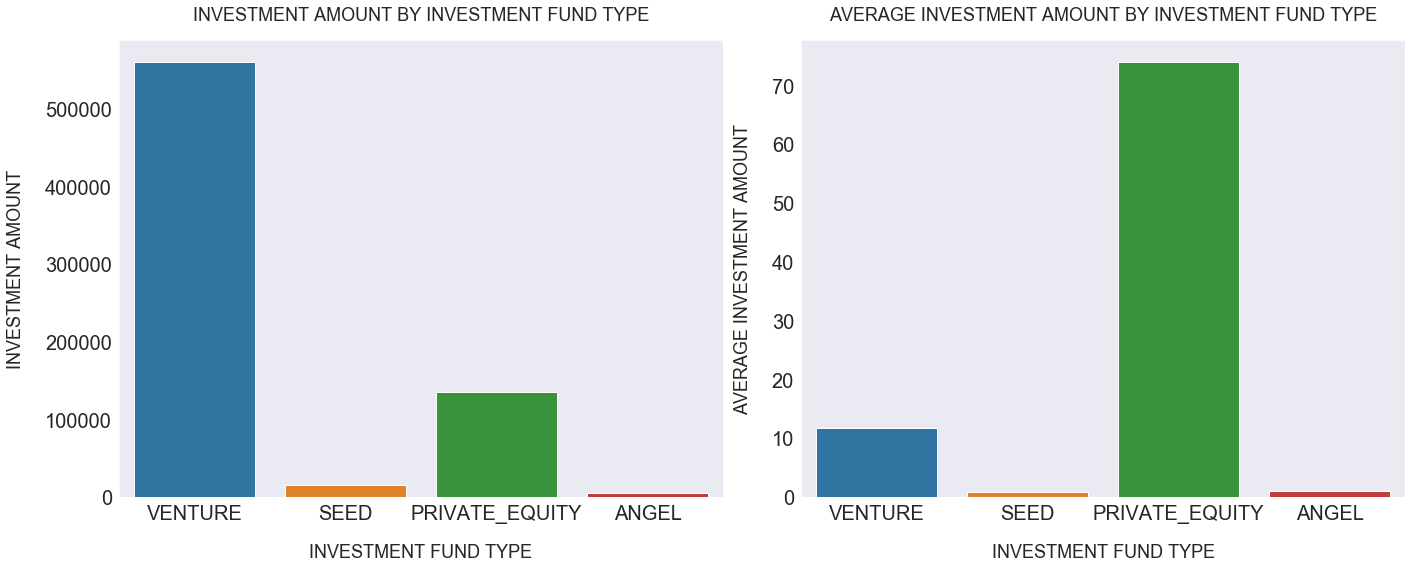

In [181]:
fig_4, ax_4 = plt.subplots(1,2, figsize=(20,8))

## plot average investment by funding type and funding round code
bar_plot6_params = { 'y':"Raised_amount_usd (millions)", 'x':"Funding_round_type", 
                     'ci':None,'data':master_frame,
                     'ax':ax_4[0],'estimator':sum
                   }

# sns.set_context("talk")

sns.barplot(**bar_plot6_params);
bar_plot6_x_labels = [labels.upper() for labels in master_frame.Funding_round_type.unique()]


ax_4[0].set_title("INVESTMENT AMOUNT BY INVESTMENT FUND TYPE", pad=20, fontsize=18)
ax_4[0].set_xlabel('INVESTMENT FUND TYPE', fontsize=18, labelpad=20);
ax_4[0].set_ylabel('INVESTMENT AMOUNT', fontsize=18, labelpad=20);
ax_4[0].set_xticklabels(bar_plot6_x_labels)
ax_4[0].tick_params(axis='both', which='major', labelsize=20);

##*******************************************************************************************************
bar_plot7_params = { 'y':"Raised_amount_usd (millions)", 'x':"Funding_round_type", 
                     'ci':None,'data':master_frame,
                      'ax':ax_4[1],'estimator':mean
                   }

# sns.set_context("talk")

sns.barplot(**bar_plot7_params);
bar_plot7_x_labels = [labels.upper() for labels in master_frame.Funding_round_type.unique()]

ax_4[1].set_title("AVERAGE INVESTMENT AMOUNT BY INVESTMENT FUND TYPE", pad=20, fontsize=18)
ax_4[1].set_xlabel('INVESTMENT FUND TYPE', fontsize=18, labelpad=20);
ax_4[1].set_ylabel('AVERAGE INVESTMENT AMOUNT', fontsize=18, labelpad=20);
ax_4[1].set_xticklabels(bar_plot7_x_labels)
ax_4[1].tick_params(axis='both', which='major', labelsize=20);
plt.tight_layout()



In [182]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75123 entries, 0 to 114947
Data columns (total 18 columns):
Company_permalink               75123 non-null object
Funding_round_permalink         75123 non-null object
Funding_round_type              75123 non-null object
Funding_round_code              26760 non-null object
Funded_at                       75123 non-null object
Raised_amount_usd               75123 non-null float64
Permalink                       75123 non-null object
Name                            75123 non-null object
Homepage_url                    72563 non-null object
Category_list                   75123 non-null object
Status                          75123 non-null object
Country_code                    75123 non-null object
State_code                      73591 non-null object
Region                          74092 non-null object
City                            74095 non-null object
Founded_at                      63896 non-null object
Raised_amount_usd (millio

In [183]:
master_frame.shape

(75123, 18)

In [184]:
fund_type_by_avg_frac = master_frame.groupby('Funding_round_type')['Raised_amount_usd (millions)']\
.agg(['mean','count'])

In [185]:
fund_type_by_avg_frac['fraction'] = (fund_type_by_avg_frac['count']/\
                                     (round(fund_type_by_avg_frac['count'].sum(),2)))*100

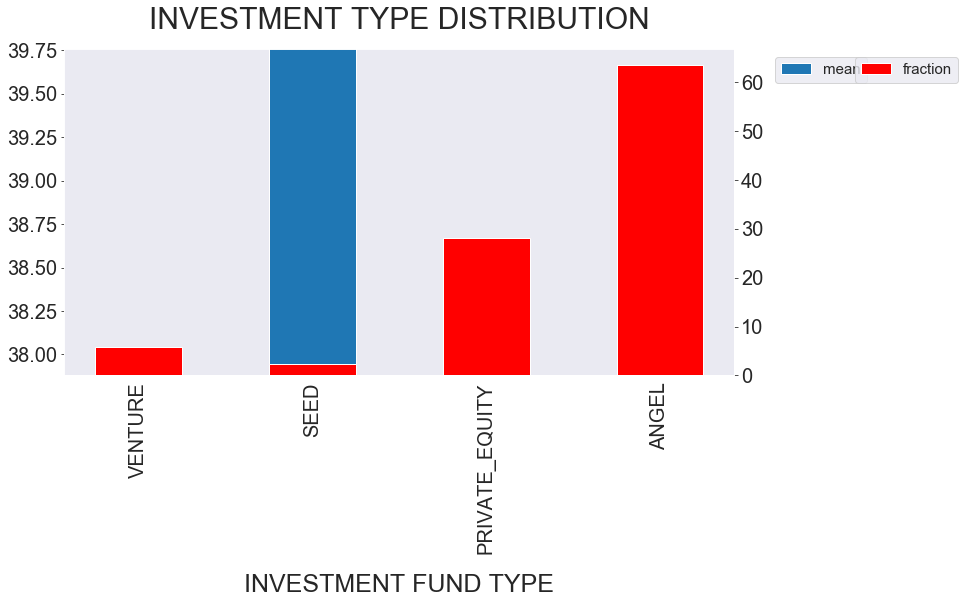

In [260]:
plot1 = fund_type_by_avg_frac['mean'].plot(kind='bar',figsize=(12,6), legend=True)
plot2 = fund_type_by_avg_frac['fraction'].plot(kind='bar', \
                                               secondary_y=True, ax=plot1, color='r', legend=True)
plot1.set_title('INVESTMENT TYPE DISTRIBUTION', fontsize=30, pad=20);
plot1.set_xlabel('INVESTMENT FUND TYPE', fontsize=25, labelpad=20);
plot1.set_xticklabels(bar_plot6_x_labels)
# ax_2[1].set_ylabel('INVESTMENT AMOUNT', fontsize=25, labelpad=20);
# plot1.set_xticklabels(bar_plot5_x_labels)
plot1_xlabels = [labels.upper() for labels in master_frame.Funding_round_type.unique()]
plot1.tick_params(axis='both', which='major', labelsize=20);
plot2.tick_params(axis='both', which='major', labelsize=20);
plot1.legend(loc=2, bbox_to_anchor=(1.05, 1),prop={'size': 15});
plot2.legend(loc=2, bbox_to_anchor=(1.17, 1),prop={'size': 15});
plot1.set_xticklabels(plot1_xlabels)
plot1.set_ylabel('')
plot1.axis('equal');
plt.savefig('plot1.png')


## Country wise Analysis

#### What are the Top 9 countries by Investment amount ?

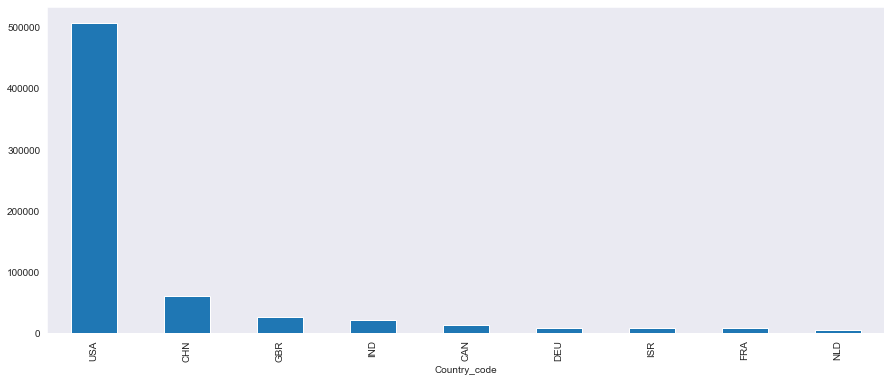

In [187]:
filter_top9_countries = list(master_frame.groupby('Country_code')['Raised_amount_usd (millions)'].\
sum()\
.sort_values(ascending=False)[:9]\
     .index)

top9_frame = master_frame[master_frame['Country_code'].isin(filter_top9_countries)]

top9_frame.groupby('Country_code')['Raised_amount_usd (millions)']\
.sum()\
.sort_values(ascending=False).plot(kind='bar', figsize=(15,6));
plt.savefig('plot2.png')

#### What are the Top 3 English speaking countries by Investment amount?

In [188]:
filter_top3_countries = ['USA','GBR','IND']
top3_frame = master_frame[master_frame['Country_code'].isin(filter_top3_countries)]

In [189]:
top3_frame.head()

Company_permalink                          Funding_round_permalink  \
0      /organization/-fame  /funding-round/9a01d05418af9f794eebff7ace91f638   
2   /organization/-qounter  /funding-round/b44fbb94153f6cdef13083530bb48030   
9     /organization/0xdata  /funding-round/383a9bd2c04f7038bb543ccef5ba3eae   
10    /organization/0xdata  /funding-round/3bb2ee4a2d89251a10aaa735b1180e44   
11    /organization/0xdata  /funding-round/ae2a174c06517c2394aed45006322a7e   

   Funding_round_type Funding_round_code   Funded_at  Raised_amount_usd  \
0             Venture                  B  05-01-2015        10000000.00   
2                Seed                NaN  01-03-2014          700000.00   
9                Seed                NaN  22-05-2013         3000000.00   
10            Venture                  B  09-11-2015        20000000.00   
11            Venture                NaN  03-01-2013         1700000.00   

                 Permalink      Name            Homepage_url  \
0      /organization/-fame     #fame      http://livfame.com   
2   /organization/-qounter  :Qounter  http://www.qounter.com   
9     /organization/0xdata    H2O.ai          http://h2o.ai/   
10    /organization/0xdata    H2O.ai          http://h2o.ai/   
11    /organization/0xdata    H2O.ai          http://h2o.ai/   

                                        Category_list     Status Country_code  \
0                                               Media  operating          IND   
2   Application Platforms|Real Time|Social Network...  operating          USA   
9                                           Analytics  operating          USA   
10                                          Analytics  operating          USA   
11                                          Analytics  operating          USA   

   State_code       Region           City  Founded_at  \
0          16       Mumbai         Mumbai         NaN   
2          DE   DE - Other  Delaware City  04-09-2014   
9          CA  SF Bay Area  Mountain View  01-01-2011   
10         CA  SF Bay Area  Mountain View  01-01-2011   
11         CA  SF Bay Area  Mountain View  01-01-2011   

    Raised_amount_usd (millions)  Funded_month  
0                          10.00             5  
2                           0.70             1  
9                           3.00             5  
10                         20.00             9  
11                          1.70             3

#### What is the main sector classification for these sub-sectors or primary sector companies?

In [190]:
## read sector mapping file
sector_map = pd.read_csv('mapping.csv')

## translate wide dataframe to long dataframe 
sector_map = pd.melt(sector_map,id_vars='category_list',var_name='Main_sector', value_name='value')

## get sector_frame rows and columns
sector_map.shape

## read sectors columns with value 1
sector_map = sector_map[sector_map['value']==1]

## reinitalize index of the sector_frame
sector_map.reset_index(inplace=True)

## delete value and index column of the sector_frame
del sector_map['value']
del sector_map['index']

In [191]:
col_list = list(sector_map.columns)
for col_no,col in enumerate(col_list):
    print(f'{col_no}-->{col.upper()}\n{find_duplicate(sector_map, col)}\n')

0-->CATEGORY_LIST
No Duplicates:     687
Name: category_list, dtype: int64

1-->MAIN_SECTOR
Duplicates:        8
No Duplicates:     1
Name: Main_sector, dtype: int64



In [192]:
## pickup the first string delimited by | from the left side 
master_frame.loc[:,'Primary_sector'] = master_frame['Category_list'].apply(lambda cat: cat.split('|')[0])

In [193]:
## merge with sector_map to get the main_sector
master_frame = master_frame.merge(sector_map, how='left', left_on='Primary_sector', right_on='category_list')

In [194]:
master_frame.Main_sector.unique()

array(['Entertainment', 'News, Search and Messaging',
       'Cleantech / Semiconductors', nan, 'Others',
       'Social, Finance, Analytics, Advertising', 'Health',
       'Manufacturing', 'Automotive & Sports'], dtype=object)

In [195]:
main_eight_sector_frame = master_frame[(master_frame['Main_sector']!='Others') & \
                                       (master_frame.Country_code.isin(['GBR','USA','IND']))]

In [196]:
main_eight_sector_frame.shape

(44171, 21)

#### What are the differnt important sectors in Top 3 English speaking countries?

In [197]:
main_eight_sector_frame = main_eight_sector_frame[~main_eight_sector_frame.Main_sector.isna()]

In [198]:
main_eight_sector_frame = main_eight_sector_frame[main_eight_sector_frame['Funding_round_type']=='Venture']

In [199]:
main_eight_sector_frame.shape

(27156, 21)

In [200]:
D1 = main_eight_sector_frame[main_eight_sector_frame['Country_code']=='USA']

In [212]:
D1.loc[:,'Total_number_investments'] = D1.groupby('Main_sector')['Main_sector'].transform('count')
D1.loc[:,'Total_investments'] = D1.groupby('Main_sector')['Raised_amount_usd (millions)'].transform('sum')

In [259]:
# D1.shape

# D1['Raised_amount_usd (millions)'].sum()

D1.groupby('Main_sector')['Main_sector'].count().sort_values(ascending=False)

# D1[D1['Main_sector']=='Cleantech / Semiconductors'][['Name','Raised_amount_usd (millions)']]\
# .sort_values(by='Raised_amount_usd (millions)',ascending=False)

Main_sector
Cleantech / Semiconductors                 7849
Social, Finance, Analytics, Advertising    5156
News, Search and Messaging                 4301
Health                                     3263
Manufacturing                              2453
Entertainment                              1756
Automotive & Sports                         505
Name: Main_sector, dtype: int64

In [247]:
D1[D1['Main_sector']=='Social, Finance, Analytics, Advertising'][['Name','Raised_amount_usd (millions)']]\
.sort_values(by='Raised_amount_usd (millions)',ascending=False)[:1]

Name  Raised_amount_usd (millions)
39458  MediaVast                       4700.00

In [203]:
D2 = main_eight_sector_frame[main_eight_sector_frame['Country_code']=='GBR']

In [204]:
D2.loc[:,'Total_number_investments'] = D2.groupby('Main_sector')['Main_sector'].transform('count')
D2.loc[:,'Total_investments'] = D2.groupby('Main_sector')['Raised_amount_usd (millions)'].transform('sum')

In [249]:
D2.groupby('Main_sector')['Main_sector'].count().sort_values(ascending=False)

Main_sector
Cleantech / Semiconductors                 433
Social, Finance, Analytics, Advertising    318
News, Search and Messaging                 241
Entertainment                              133
Manufacturing                              122
Health                                     118
Automotive & Sports                         44
Name: Main_sector, dtype: int64

In [257]:
# D2.shape

# D2['Raised_amount_usd (millions)'].sum()

D2.groupby('Main_sector')['Main_sector'].count().sort_values(ascending=False)

# D2[D3['Main_sector']=='Cleantech / Semiconductors'][['Name','Raised_amount_usd (millions)']]\
# .sort_values(by='Raised_amount_usd (millions)',ascending=False)

Main_sector
Cleantech / Semiconductors                 433
Social, Finance, Analytics, Advertising    318
News, Search and Messaging                 241
Entertainment                              133
Manufacturing                              122
Health                                     118
Automotive & Sports                         44
Name: Main_sector, dtype: int64

In [205]:
D3 = main_eight_sector_frame[main_eight_sector_frame['Country_code']=='IND']

In [206]:
D3.loc[:,'Total_number_investments'] = D3.groupby('Main_sector')['Main_sector'].transform('count')
D3.loc[:,'Total_investments'] = D3.groupby('Main_sector')['Raised_amount_usd (millions)'].transform('sum')

In [258]:
# D3.shape

# D3['Raised_amount_usd (millions)'].sum()

D3.groupby('Main_sector')['Main_sector'].count().sort_values(ascending=False)

# D3[D3['Main_sector']=='News, Search and Messaging'][['Name','Raised_amount_usd (millions)']]\
# .sort_values(by='Raised_amount_usd (millions)',ascending=False)

Main_sector
News, Search and Messaging                 130
Social, Finance, Analytics, Advertising     77
Entertainment                               75
Manufacturing                               55
Cleantech / Semiconductors                  54
Health                                      42
Automotive & Sports                         31
Name: Main_sector, dtype: int64

In [207]:
def get_country_top3_main_sec(country):
    return main_eight_sector_frame.groupby(['Country_code','Main_sector'])['Raised_amount_usd (millions)'].count()\
.reset_index().sort_values(['Country_code', 'Raised_amount_usd (millions)'], ascending=False)\
.set_index(['Country_code','Main_sector']).loc[[country],:][:3]

In [208]:
GBR = get_country_top3_main_sec('GBR')

IND = get_country_top3_main_sec('IND')

USA = get_country_top3_main_sec('USA')

In [218]:
GBR.rename(columns={'Raised_amount_usd (millions)': 'Number_of_Investments'}, inplace=True)

In [220]:
IND.rename(columns={'Raised_amount_usd (millions)': 'Number_of_Investments'}, inplace=True)

In [221]:
USA.rename(columns={'Raised_amount_usd (millions)': 'Number_of_Investments'}, inplace=True)

In [222]:
country_top3_sector_frame = pd.concat([GBR,IND,USA])

In [223]:
country_top3_sector_frame.reset_index(inplace=True)

In [227]:
country_top3_sector_frame

Country_code                              Main_sector  Number_of_Investments
0          GBR               Cleantech / Semiconductors                    433
1          GBR  Social, Finance, Analytics, Advertising                    318
2          GBR               News, Search and Messaging                    241
3          IND               News, Search and Messaging                    130
4          IND  Social, Finance, Analytics, Advertising                     77
5          IND                            Entertainment                     75
6          USA               Cleantech / Semiconductors                   7849
7          USA  Social, Finance, Analytics, Advertising                   5156
8          USA               News, Search and Messaging                   4301

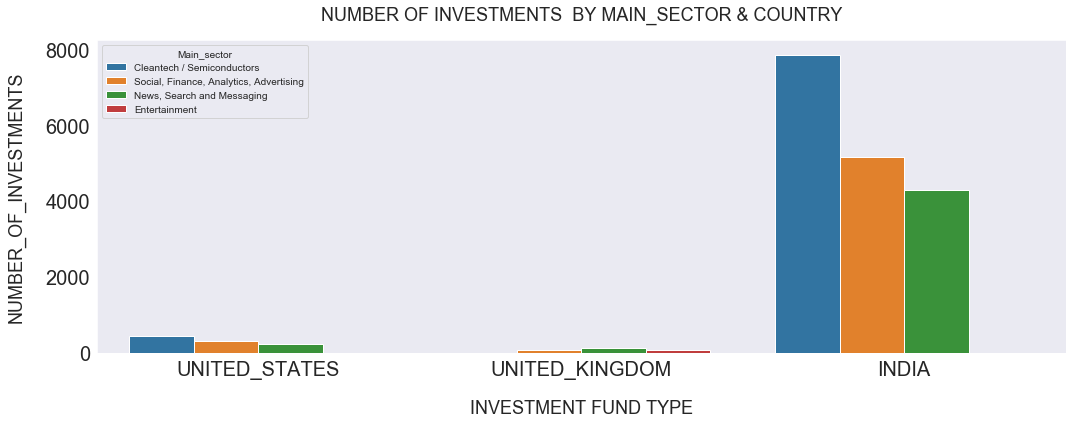

In [231]:
fig_5, ax_5 = plt.subplots(1,1, figsize=(15,6))
sns.barplot(x='Country_code', y='Number_of_Investments', hue='Main_sector',\
            data=country_top3_sector_frame, ax=ax_5);
ax_5.set_title("NUMBER OF INVESTMENTS  BY MAIN_SECTOR & COUNTRY", pad=20, fontsize=18)
ax_5.set_xlabel('INVESTMENT FUND TYPE', fontsize=18, labelpad=20);
ax_5.set_ylabel('NUMBER_OF_INVESTMENTS', fontsize=18, labelpad=20);
ax_5_xlabels = ['UNITED_STATES','UNITED_KINGDOM','INDIA']
ax_5.set_xticklabels(ax_5_xlabels)
ax_5.tick_params(axis='both', which='major', labelsize=20);
plt.tight_layout()
plt.savefig('plot3.png')
